In [1]:
import requests
import json
import bs4
import pandas as pd
import datetime
import sqlite3
import ast
import warnings

from geopy.geocoders import Nominatim
from datetime import datetime

warnings.filterwarnings('ignore')

In [2]:
# Get Philippine earthquake data from 2010 to present
# Get only earthquake with magnitude 4 to 10

baseurl = 'https://earthquake.usgs.gov/fdsnws/event/1/query?'
params = {'format': 'geojson',
          'starttime': "2010-01-01",
          'endtime': '2021-11-30',
          'minmagnitude': '4',
          'maxmagnitude': '10',
          'minlatitude': '5',
          'maxlatitude': '20',
          'minlongitude': '115',
          'maxlongitude': '130',
          'orderby': 'time',
          'limit': '20000',
          'eventtype': 'earthquake'
         }
res = requests.get(baseurl, params=params)
if res.status_code == 200:
    print("Success! API status code: ", res.status_code)
else:
    print("An error occurred.")
    
data = res.json()

Success! API status code:  200


In [3]:
usgs_api_df = pd.json_normalize(data['features'], max_level=3)
usgs_api_df.columns = ['data_type', 'id', 'mag', 'place', 'time', 'updated',
                       'tz', 'url', 'detail', 'felt', 'cdi', 'mmi', 'alert',
                       'status', 'tsunami', 'sig', 'net', 'code', 'ids',
                       'sources', 'types', 'nst', 'dmin', 'rms', 'gap',
                       'magType', 'parameter_type', 'title',
                       'coordinate_type', 'coordinates']

usgs_api_df['time'] = pd.to_datetime(
    usgs_api_df['time'].astype(int), unit='ms')
usgs_api_df['updated'] = pd.to_datetime(
    usgs_api_df['updated'].astype(int), unit='ms')

usgs_api_df

,data_type,id,mag,place,time,updated,tz,url,detail,felt,...,types,nst,dmin,rms,gap,magType,parameter_type,title,coordinate_type,coordinates
0,Feature,us6000g88j,4.4,"38 km ENE of Santa Monica, Philippines",2021-11-26 23:14:12.287,2021-12-04 22:50:42.040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,3.188,0.70,115.0,mb,earthquake,"M 4.4 - 38 km ENE of Santa Monica, Philippines",Point,"[126.3446, 10.1871, 46.31]"
1,Feature,us7000fx8r,4.7,"28 km NE of Santa Monica, Philippines",2021-11-26 15:47:45.409,2021-11-26 16:23:54.040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,3.164,1.04,108.0,mb,earthquake,"M 4.7 - 28 km NE of Santa Monica, Philippines",Point,"[126.2369, 10.1861, 49.04]"
2,Feature,us7000fx8i,4.4,"76 km ENE of Sulangan, Philippines",2021-11-26 14:50:07.267,2021-11-27 07:25:13.040,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",origin,phase-data,",NaN,4.102,0.43,84.0,mb,earthquake,"M 4.4 - 76 km ENE of Sulangan, Philippines",Point,"[126.5123, 11.0924, 10]"
3,Feature,us7000fwed,4.9,"21 km ENE of La Paz, Philippines",2021-11-23 08:09:43.696,2021-11-23 10:05:38.037,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,4.0,...,",dyfi,origin,phase-data,",NaN,2.150,0.65,113.0,mb,earthquake,"M 4.9 - 21 km ENE of La Paz, Philippines",Point,"[126.4475, 9.0538, 66.59]"
4,Feature,us7000fx9d,4.4,"11 km W of Da-an Sur, Philippines",2021-11-22 12:49:49.582,2021-11-29 08:44:40.450,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,1.0,...,",dyfi,origin,phase-data,",NaN,7.122,0.52,130.0,mb,earthquake,"M 4.4 - 11 km W of Da-an Sur, Philippines",Point,"[122.3188, 11.2532, 31.62]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5793,Feature,usp000h5wf,4.6,"94 km NNE of Namuac, Philippines",2010-01-10 00:37:37.850,2014-11-07 01:40:26.126,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",impact-text,origin,phase-data,",16.0,NaN,0.86,122.3,mb,earthquake,"M 4.6 - 94 km NNE of Namuac, Philippines",Point,"[121.452, 19.416, 36.8]"
5794,Feature,usp000h5v2,5.4,"71 km ESE of Pondaguitan, Philippines",2010-01-08 12:14:59.610,2016-11-10 02:22:30.488,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",focal-mechanism,impact-text,moment-tensor,ori...",147.0,NaN,0.88,43.8,mwc,earthquake,"M 5.4 - 71 km ESE of Pondaguitan, Philippines",Point,"[126.759, 6.077, 120.1]"
5795,Feature,usp000h5nb,5.2,"14 km ENE of Pondaguitan, Philippines",2010-01-03 21:38:41.510,2014-11-07 01:40:24.172,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",impact-text,origin,phase-data,",90.0,NaN,0.81,75.2,mb,earthquake,"M 5.2 - 14 km ENE of Pondaguitan, Philippines",Point,"[126.293, 6.426, 60.3]"
5796,Feature,usp000h5jy,4.7,"125 km NNE of Cabodiongan, Philippines",2010-01-01 05:37:13.490,2014-11-07 01:40:22.558,None,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/fdsnws/event/1/que...,NaN,...,",impact-text,origin,phase-data,",60.0,NaN,0.64,55.4,mb,earthquake,"M 4.7 - 125 km NNE of Cabodiongan, Philippines",Point,"[125.554, 13.687, 22.9]"


In [4]:
usgs_api_df.columns

Index(['data_type', 'id', 'mag', 'place', 'time', 'updated', 'tz', 'url',
       'detail', 'felt', 'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig',
       'net', 'code', 'ids', 'sources', 'types', 'nst', 'dmin', 'rms', 'gap',
       'magType', 'parameter_type', 'title', 'coordinate_type', 'coordinates'],
      dtype='object')

In [5]:
usgs_api_df['coordinate_type'].unique()

array(['Point'], dtype=object)

In [6]:
usgs_api_df['coordinates'].sample()

1352    [124.7935, 5.3468, 10]
Name: coordinates, dtype: object

**NOTE:** Coordinates are given in the WGS84 reference frame. The three values represent the longitude, latitude and depth in order.

Data Dictionary 
https://earthquake.usgs.gov/data/comcat/index.php#felt

* mag - The magnitude for the event. size of the earthquake 
* place - Textual description of named geographic region near to the event. This may be a city name, or a Flinn-Engdahl Region name.
* time - Time when the event occurred. 
* updated - Time when the event was most recently updated. 
* tz - Timezone offset from UTC in minutes at the event epicenter.
* felt - The total number of felt reports submitted to the DYFI? system.
* cdi - The maximum reported intensity for the event. Computed by DYFI. While typically reported as a roman numeral, for the purposes of this API, intensity is expected as the decimal equivalent of the roman numeral. intensity  is measure of shaking at each location, and this varies from place to place,
* mmi - The maximum estimated instrumental intensity for the event. Computed by ShakeMap. While typically reported as a roman numeral, for the purposes of this API, intensity is expected as the decimal equivalent of the roman numeral. Learn more about magnitude vs. intensity.
* alert - The alert level from the PAGER earthquake impact scale. ( The PAGER system provides fatality and economic loss impact estimates following significant earthquakes worldwide.)
* status - Indicates whether the event has been reviewed by a human.
* sig - A number describing how significant the event is. Larger numbers indicate a more significant event. This value is determined on a number of factors, including: magnitude, maximum MMI, felt reports, and estimated impact.
* magType- The method or algorithm used to calculate the preferred magnitude for the event.

In [7]:
# Get only relevant columns
ph_quakes = usgs_api_df[['mag',
                         'place',
                         'time',
                         'updated',
                         'felt',
                         'cdi',
                         'mmi',
                         'alert', 
                         'sig',
                         'magType',
                         'coordinates']]
display(ph_quakes)

,mag,place,time,updated,felt,cdi,mmi,alert,sig,magType,coordinates
0,4.4,"38 km ENE of Santa Monica, Philippines",2021-11-26 23:14:12.287,2021-12-04 22:50:42.040,NaN,NaN,NaN,None,298,mb,"[126.3446, 10.1871, 46.31]"
1,4.7,"28 km NE of Santa Monica, Philippines",2021-11-26 15:47:45.409,2021-11-26 16:23:54.040,NaN,NaN,NaN,None,340,mb,"[126.2369, 10.1861, 49.04]"
2,4.4,"76 km ENE of Sulangan, Philippines",2021-11-26 14:50:07.267,2021-11-27 07:25:13.040,NaN,NaN,NaN,None,298,mb,"[126.5123, 11.0924, 10]"
3,4.9,"21 km ENE of La Paz, Philippines",2021-11-23 08:09:43.696,2021-11-23 10:05:38.037,4.0,4.6,NaN,None,371,mb,"[126.4475, 9.0538, 66.59]"
4,4.4,"11 km W of Da-an Sur, Philippines",2021-11-22 12:49:49.582,2021-11-29 08:44:40.450,1.0,2.0,NaN,None,298,mb,"[122.3188, 11.2532, 31.62]"
...,...,...,...,...,...,...,...,...,...,...,...
5793,4.6,"94 km NNE of Namuac, Philippines",2010-01-10 00:37:37.850,2014-11-07 01:40:26.126,NaN,NaN,NaN,None,326,mb,"[121.452, 19.416, 36.8]"
5794,5.4,"71 km ESE of Pondaguitan, Philippines",2010-01-08 12:14:59.610,2016-11-10 02:22:30.488,NaN,NaN,NaN,None,449,mwc,"[126.759, 6.077, 120.1]"
5795,5.2,"14 km ENE of Pondaguitan, Philippines",2010-01-03 21:38:41.510,2014-11-07 01:40:24.172,NaN,NaN,NaN,None,416,mb,"[126.293, 6.426, 60.3]"
5796,4.7,"125 km NNE of Cabodiongan, Philippines",2010-01-01 05:37:13.490,2014-11-07 01:40:22.558,NaN,NaN,NaN,None,340,mb,"[125.554, 13.687, 22.9]"


In [8]:
ph_quakes['coordinates'].apply(lambda x: x[0])

0       126.3446
1       126.2369
2       126.5123
3       126.4475
4       122.3188
          ...   
5793    121.4520
5794    126.7590
5795    126.2930
5796    125.5540
5797    127.1210
Name: coordinates, Length: 5798, dtype: float64

In [9]:
ph_quakes['longitude'] = ph_quakes['coordinates'].apply(lambda x: x[0])
ph_quakes['latitude'] = ph_quakes['coordinates'].apply(lambda x: x[1])

In [10]:
ph_quakes.head(2)

,mag,place,time,updated,felt,cdi,mmi,alert,sig,magType,coordinates,longitude,latitude
0,4.4,"38 km ENE of Santa Monica, Philippines",2021-11-26 23:14:12.287,2021-12-04 22:50:42.040,NaN,NaN,NaN,None,298,mb,"[126.3446, 10.1871, 46.31]",126.3446,10.1871
1,4.7,"28 km NE of Santa Monica, Philippines",2021-11-26 15:47:45.409,2021-11-26 16:23:54.040,NaN,NaN,NaN,None,340,mb,"[126.2369, 10.1861, 49.04]",126.2369,10.1861


In [11]:
import geopandas as gpd
import psycopg2
from shapely.geometry import Point, LineString, Polygon

In [12]:
ph_quakes['Point'] = ph_quakes['coordinates'].apply(lambda x: Point(x[:2]))

In [13]:
# df = gpd.read_postgis('''
# select * 
# from gadm.ph
# ''', con = conn)

In [14]:
# df.head(2)

The most common SRID for geographic coordinates is 4326, which corresponds to “longitude/latitude on the WGS84 spheroid”. You can see the definition here: https://epsg.io/4326

In [15]:
conn = psycopg2.connect(dbname="postgis", 
                 user="gsa2022", 
                 password="g5!V%T1Vmd", 
                 host="192.168.212.99", 
                 port=32771)
                        
 #ERROR: InsufficientPrivilege: permission denied to create database


In [16]:
# pd.read_sql("""with epicenter as (
#   SELECT ST_SetSRID(ST_MakePoint(lat, long), 4326) as point
#   FROM json_to_recordset(%s) AS z(long double precision, lat double precision)
#   )
#   ,
#   select ph.*,
#           st_buffer()
#   from public.ph_point as ph
  
#   """, params = (json_string,), con=conn)

In [17]:
ph_quakes.isna().sum()

mag               0
place             1
time              0
updated           0
felt           4546
cdi            4546
mmi            5617
alert          5661
sig               0
magType           0
coordinates       0
longitude         0
latitude          0
Point             0
dtype: int64

In [18]:
ph_quakes.head(2)

,mag,place,time,updated,felt,cdi,mmi,alert,sig,magType,coordinates,longitude,latitude,Point
0,4.4,"38 km ENE of Santa Monica, Philippines",2021-11-26 23:14:12.287,2021-12-04 22:50:42.040,NaN,NaN,NaN,None,298,mb,"[126.3446, 10.1871, 46.31]",126.3446,10.1871,POINT (126.3446 10.1871)
1,4.7,"28 km NE of Santa Monica, Philippines",2021-11-26 15:47:45.409,2021-11-26 16:23:54.040,NaN,NaN,NaN,None,340,mb,"[126.2369, 10.1861, 49.04]",126.2369,10.1861,POINT (126.2369 10.1861)


In [19]:
ph_quakes.sort_values(by='time', ascending=False, inplace=True)

- 4.0-4.9	Light.	
        Noticeable shaking of indoor items, rattling noises. Significant damage unlikely.
- 5.0-5.9	Moderate.
        Can cause major damage to poorly constructed buildings over small regions. At most slight damage to well-designed buildings.
- 6.0-6.9   Strong.
        Can be destructive in areas up to about 160 kilometres (100 mi) across in populated areas.
- 7.0-7.9	Major.
        Can cause serious damage over larger areas.
- 8.0-8.9	Great.
        Can cause serious damage in areas several hundred miles across.
- 9.0-9.9    Epic.
         Devastating in areas several thousand miles across.

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-2gb8rbjt because the default path (/home/jjayme/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<AxesSubplot:>

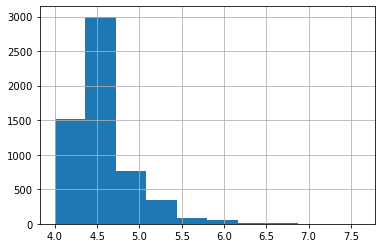

In [20]:
ph_quakes['mag'].hist()

In [21]:
ph_quakes['mag'].describe()

count    5798.000000
mean        4.570697
std         0.372625
min         4.000000
25%         4.300000
50%         4.500000
75%         4.700000
max         7.600000
Name: mag, dtype: float64

In [22]:
ph_quakes['light'] = (ph_quakes['mag'] >= 4.0) & (ph_quakes['mag'] < 5.0)
ph_quakes['moderate'] = (ph_quakes['mag'] >= 5.0) & (ph_quakes['mag'] < 6.0)
ph_quakes['strong'] = (ph_quakes['mag'] >= 6.0) & (ph_quakes['mag'] < 7.0)
ph_quakes['major'] = (ph_quakes['mag'] >= 7.0) & (ph_quakes['mag'] < 8.0)

In [23]:
light_df = ph_quakes[ph_quakes['light']==1]
moderate_df = ph_quakes[ph_quakes['moderate']==1]
strong_df = ph_quakes[ph_quakes['strong']==1]
major_df = ph_quakes[ph_quakes['major']==1]

In [24]:
light_df.shape, moderate_df.shape, strong_df.shape, major_df.shape

((5100, 18), (644, 18), (47, 18), (7, 18))

In [25]:
coords = list()
for lng, lt in ph_quakes['coordinates'].apply(lambda x: x[:2]):
    d1 = {'lat': None, 'long': None}
    d1['lat'] = lt
    d1['long'] =lng
    coords.append(d1)
import json
json_all = json.dumps(coords)

In [26]:
coords = list()
for lng, lt in light_df['coordinates'].apply(lambda x: x[:2]):
    d1 = {'lat': None, 'long': None}
    d1['lat'] = lt
    d1['long'] =lng
    coords.append(d1)
import json
json_light = json.dumps(coords)


coords = list()
for lng, lt in moderate_df['coordinates'].apply(lambda x: x[:2]):
    d1 = {'lat': None, 'long': None}
    d1['lat'] = lt
    d1['long'] =lng
    coords.append(d1)
import json
json_moderate = json.dumps(coords)

coords = list()
for lng, lt in strong_df['coordinates'].apply(lambda x: x[:2]):
    d1 = {'lat': None, 'long': None}
    d1['lat'] = lt
    d1['long'] =lng
    coords.append(d1)
import json
json_strong = json.dumps(coords)


coords = list()
for lng, lt in major_df['coordinates'].apply(lambda x: x[:2]):
    d1 = {'lat': None, 'long': None}
    d1['lat'] = lt
    d1['long'] =lng
    coords.append(d1)
import json
json_major = json.dumps(coords)

# Cities and Municipalities affected from Epicenter

# Strong - 100km

In [27]:
df_strong_affected = gpd.read_postgis("""
  with epicenter as (
  SELECT ST_transform(ST_SetSRID(ST_MakePoint(long, lat), 4326), 3123) as point,
  ROW_NUMBER() OVER (ORDER BY (SELECT 1)) AS id
  FROM json_to_recordset(%s) AS z(long double precision, lat double precision)
  )
  
  select g.*, ha.point, ha.id
  from gadm.ph as g
  JOIN epicenter ha
  ON ST_DWITHIN(ha.point, st_transform(g.geom, 3123), 100000)
  """, params = (json_strong,), con=conn, geom_col='geom')

In [28]:
df_strong_affected.head(2)

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,type_2,engtype_2,cc_2,hasc_2,geom,point,id
0,1514,PHL,Philippines,PHL.75_1,Surigao del Sur,None,PHL.75.1_1,Barobo,None,None,Bayan|Munisipyo,Municipality,166801,PH.SS.BR,"MULTIPOLYGON (((126.17639 8.56222, 126.17611 8...",0101000020330C00007B872B28C68530419D5E7F6AA8AD...,5
1,1514,PHL,Philippines,PHL.75_1,Surigao del Sur,None,PHL.75.1_1,Barobo,None,None,Bayan|Munisipyo,Municipality,166801,PH.SS.BR,"MULTIPOLYGON (((126.17639 8.56222, 126.17611 8...",0101000020330C0000B071CF25AF4A30418704E073A93C...,38


In [29]:
ids= strong_df.reset_index(drop=True).index
strong_df['id'] = ids
strong_eq_cities_affected = df_strong_affected.merge(strong_df, on = 'id')

In [30]:
strong_eq_cities_affected.head()

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,...,sig,magType,coordinates,longitude,latitude,Point,light,moderate,strong,major
0,1514,PHL,Philippines,PHL.75_1,Surigao del Sur,None,PHL.75.1_1,Barobo,None,None,...,634,mww,"[125.8285, 6.2693, 120]",125.8285,6.2693,POINT (125.8285 6.2693),False,False,True,False
1,28,PHL,Philippines,PHL.2_1,Agusan del Norte,None,PHL.2.1_1,Buenavista,None,None,...,634,mww,"[125.8285, 6.2693, 120]",125.8285,6.2693,POINT (125.8285 6.2693),False,False,True,False
2,33,PHL,Philippines,PHL.2_1,Agusan del Norte,None,PHL.2.6_1,Kitcharao,None,None,...,634,mww,"[125.8285, 6.2693, 120]",125.8285,6.2693,POINT (125.8285 6.2693),False,False,True,False
3,29,PHL,Philippines,PHL.2_1,Agusan del Norte,None,PHL.2.2_1,Butuan City,None,None,...,634,mww,"[125.8285, 6.2693, 120]",125.8285,6.2693,POINT (125.8285 6.2693),False,False,True,False
4,30,PHL,Philippines,PHL.2_1,Agusan del Norte,None,PHL.2.3_1,Cabadbaran City,None,None,...,634,mww,"[125.8285, 6.2693, 120]",125.8285,6.2693,POINT (125.8285 6.2693),False,False,True,False


In [31]:
strong_eq_cities_affected.shape

(2926, 35)

# Major - 200km

In [32]:
df_major_affected = gpd.read_postgis("""
  with epicenter as (
  SELECT ST_transform(ST_SetSRID(ST_MakePoint(long, lat), 4326), 3123) as point,
  ROW_NUMBER() OVER (ORDER BY (SELECT 1)) AS id
  FROM json_to_recordset(%s) AS z(long double precision, lat double precision)
  )
  
  select g.*, ha.point, ha.id
  from gadm.ph as g
  JOIN epicenter ha
  ON ST_DWITHIN(ha.point, st_transform(g.geom, 3123), 200000)
  """, params = (json_major,), con=conn, geom_col='geom')

In [33]:
df_major_affected.shape

(1387, 17)

In [34]:
ids= major_df.reset_index(drop=True).index
major_df['id'] = ids
major_df.head(2)

,mag,place,time,updated,felt,cdi,mmi,alert,sig,magType,coordinates,longitude,latitude,Point,light,moderate,strong,major,id
198,7.1,"60 km ENE of Pondaguitan, Philippines",2021-08-11 17:46:13.143,2021-12-04 06:24:52.059,77.0,9.1,6.777,green,846,mww,"[126.7151, 6.4748, 55.14]",126.7151,6.4748,POINT (126.7151 6.4748),False,False,False,True,0
1833,7.0,"96 km ESE of Pondaguitan, Philippines",2018-12-29 03:39:09.740,2021-05-14 10:00:23.756,95.0,5.2,5.220,green,803,mww,"[126.9209, 5.8983, 60.21]",126.9209,5.8983,POINT (126.9209 5.8983),False,False,False,True,1


In [35]:
major_eq_cities_affected = df_major_affected.merge(major_df, on = 'id')

In [36]:
major_eq_cities_affected.head(2)

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,...,sig,magType,coordinates,longitude,latitude,Point,light,moderate,strong,major
0,28,PHL,Philippines,PHL.2_1,Agusan del Norte,None,PHL.2.1_1,Buenavista,None,None,...,1115,mww,"[126.638, 10.811, 28]",126.638,10.811,POINT (126.638 10.811),False,False,False,True
1,33,PHL,Philippines,PHL.2_1,Agusan del Norte,None,PHL.2.6_1,Kitcharao,None,None,...,1115,mww,"[126.638, 10.811, 28]",126.638,10.811,POINT (126.638 10.811),False,False,False,True


# Moderate - 20 km

In [37]:
df_moderate_affected = gpd.read_postgis("""
  with epicenter as (
  SELECT ST_transform(ST_SetSRID(ST_MakePoint(long, lat), 4326), 3123) as point,
  ROW_NUMBER() OVER (ORDER BY (SELECT 1)) AS id
  FROM json_to_recordset(%s) AS z(long double precision, lat double precision)
  )
  
  select g.*, ha.point, ha.id
  from gadm.ph as g
  JOIN epicenter ha
  ON ST_DWITHIN(ha.point, st_transform(g.geom, 3123), 20000)
  """, params = (json_moderate,), con=conn, geom_col='geom')

In [38]:
df_moderate_affected.shape

(2240, 17)

In [39]:
ids= moderate_df.reset_index(drop=True).index
moderate_df['id'] = ids
moderate_eq_cities_affected = df_moderate_affected.merge(moderate_df, on = 'id')

In [40]:
moderate_eq_cities_affected.head(2)

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,...,sig,magType,coordinates,longitude,latitude,Point,light,moderate,strong,major
0,1,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.1_1,Bangued,None,None,...,474,mww,"[119.8464, 16.4895, 37]",119.8464,16.4895,POINT (119.8464 16.4895),False,True,False,False
1,6,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.6_1,Danglas,None,None,...,474,mww,"[119.8464, 16.4895, 37]",119.8464,16.4895,POINT (119.8464 16.4895),False,True,False,False


# Light - 5 km

In [41]:
df_light_affected = gpd.read_postgis("""
  with epicenter as (
  SELECT ST_transform(ST_SetSRID(ST_MakePoint(long, lat), 4326), 3123) as point,
  ROW_NUMBER() OVER (ORDER BY (SELECT 1)) AS id
  FROM json_to_recordset(%s) AS z(long double precision, lat double precision)
  )
  
  select g.*, ha.point, ha.id
  from gadm.ph as g
  JOIN epicenter ha
  ON ST_DWITHIN(ha.point, st_transform(g.geom, 3123), 5000)
  """, params = (json_light,), con=conn, geom_col='geom')

In [42]:
df_light_affected.shape

(3803, 17)

In [43]:
ids= light_df.reset_index(drop=True).index
light_df['id'] = ids
light_eq_cities_affected = df_light_affected.merge(light_df, on = 'id')

In [44]:
df_all_affected = pd.concat([light_eq_cities_affected, moderate_eq_cities_affected,
          strong_eq_cities_affected, major_eq_cities_affected])

In [45]:
df_all_affected.to_csv('affected_areas_v1.csv')

In [46]:
df_all_affected.shape

(10092, 35)

In [47]:
df_all_affected.head()

,gid,gid_0,name_0,gid_1,name_1,nl_name_1,gid_2,name_2,varname_2,nl_name_2,...,sig,magType,coordinates,longitude,latitude,Point,light,moderate,strong,major
0,3,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.3_1,Bucay,None,None,...,326,mb,"[125.704, 6.176, 122.7]",125.704,6.176,POINT (125.704 6.176),True,False,False,False
1,7,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.7_1,Dolores,None,None,...,326,mb,"[125.704, 6.176, 122.7]",125.704,6.176,POINT (125.704 6.176),True,False,False,False
2,10,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.10_1,Lagangilang,None,None,...,326,mb,"[125.704, 6.176, 122.7]",125.704,6.176,POINT (125.704 6.176),True,False,False,False
3,22,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.22_1,San Juan,None,None,...,326,mb,"[125.704, 6.176, 122.7]",125.704,6.176,POINT (125.704 6.176),True,False,False,False
4,24,PHL,Philippines,PHL.1_1,Abra,None,PHL.1.24_1,Tayum,None,None,...,326,mb,"[125.704, 6.176, 122.7]",125.704,6.176,POINT (125.704 6.176),True,False,False,False


In [48]:
df_all_affected.columns

Index(['gid', 'gid_0', 'name_0', 'gid_1', 'name_1', 'nl_name_1', 'gid_2',
       'name_2', 'varname_2', 'nl_name_2', 'type_2', 'engtype_2', 'cc_2',
       'hasc_2', 'geom', 'point', 'id', 'mag', 'place', 'time', 'updated',
       'felt', 'cdi', 'mmi', 'alert', 'sig', 'magType', 'coordinates',
       'longitude', 'latitude', 'Point', 'light', 'moderate', 'strong',
       'major'],
      dtype='object')

In [49]:
features = ['name_0', 'name_1', 'name_2', 'geom', 'point', 'coordinates','mag', 'place', 'time', 'updated',
       'felt', 'cdi', 'mmi', 'alert', 'sig', 'magType', 'coordinates',
       'longitude', 'latitude', 'Point', 'light', 'moderate', 'strong',
       'major']
df_new = df_all_affected[features]

In [51]:
df_new.head(2)

,name_0,name_1,name_2,geom,point,coordinates,mag,place,time,updated,...,sig,magType,coordinates,longitude,latitude,Point,light,moderate,strong,major
0,Philippines,Abra,Bucay,"MULTIPOLYGON (((120.70788 17.45395, 120.70621 ...",0101000020330C0000FE0B4B8FA0C71C41BD200D81D2BD...,"[125.704, 6.176, 122.7]",4.6,"3 km N of Lapuan, Philippines",2012-07-29 03:27:50,2014-11-07 01:48:24.913,...,326,mb,"[125.704, 6.176, 122.7]",125.704,6.176,POINT (125.704 6.176),True,False,False,False
1,Philippines,Abra,Dolores,"MULTIPOLYGON (((120.70375 17.62533, 120.70188 ...",0101000020330C0000FE0B4B8FA0C71C41BD200D81D2BD...,"[125.704, 6.176, 122.7]",4.6,"3 km N of Lapuan, Philippines",2012-07-29 03:27:50,2014-11-07 01:48:24.913,...,326,mb,"[125.704, 6.176, 122.7]",125.704,6.176,POINT (125.704 6.176),True,False,False,False


In [57]:
df_new['light'] = df_new['light'].astype(int)
df_new['moderate'] = df_new['moderate'].astype(int)
df_new['strong'] = df_new['strong'].astype(int)
df_new['major'] = df_new['major'].astype(int)

In [61]:
df_new['year'] = df_new['time'].dt.year
df_new.groupby(['name_2', 'name_1', 'year'])['mag'].mean()

name_2        name_1              year
Abra de Ilog  Occidental Mindoro  2011    5.075000
                                  2012    5.366667
                                  2014    4.700000
                                  2015    4.750000
                                  2016    4.675000
                                            ...   
Zarraga       Iloilo              2012    7.600000
Zumarraga     Samar               2012    4.500000
                                  2017    6.000000
                                  2019    6.100000
                                  2020    6.400000
Name: mag, Length: 5090, dtype: float64

In [62]:
df_new.to_csv('cleaned_affected_areas_eq.csv')